In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
path = './titanic.csv'
df = pd.read_csv(path)

In [9]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df.Survived.value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

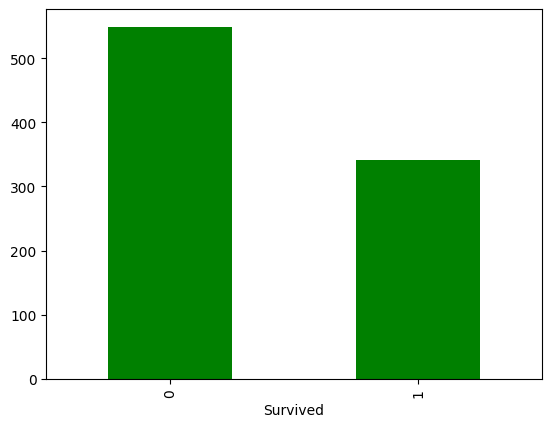

In [7]:
df.Survived.value_counts().plot(kind='bar', color='green')

In [14]:
survived_sex

Survived,0,1
Sex,,
female,81,233
male,468,109


<Axes: xlabel='Sex'>

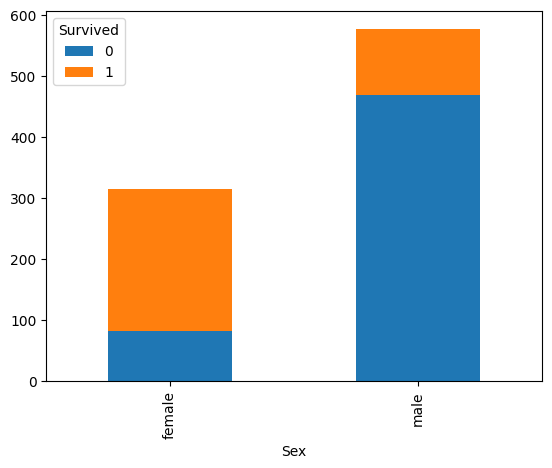

In [4]:
survived_sex = df.groupby(['Sex', 'Survived']).size().unstack()
survived_sex.plot(kind='bar', stacked=True)

In [42]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [43]:
## Obtenemos los cuantiles y el RIC
q1 = df['Age'].quantile(0.25)
q2 = df['Age'].quantile(0.5)
q3 = df['Age'].quantile(0.75)
ric = q3 - q1

## Generamos el filtro:
age_outliers_mask = (df['Age'] > q1 - 1.5*ric) & (df['Age'] < q3 + 1.5*ric)

In [44]:
df = df[age_outliers_mask]
df['Age'] = df.loc[:, 'Age'].astype("int")

<ipython-input-44-e5ca9a3d65aa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df.loc[:, 'Age'].astype("int")


In [16]:
df['Survived'] == 1

0      False
1       True
2       True
3       True
4      False
       ...  
886    False
887     True
888    False
889     True
890    False
Name: Survived, Length: 891, dtype: bool

<Axes: ylabel='Frequency'>

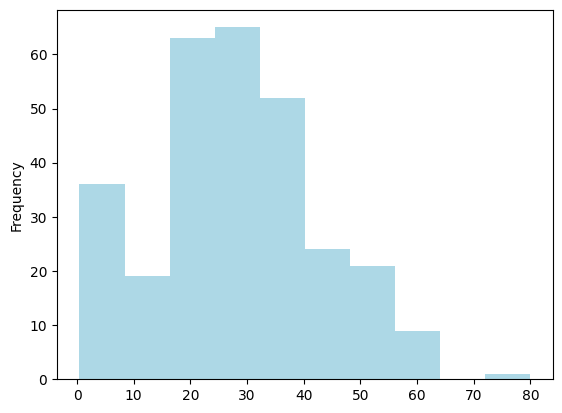

In [17]:
df[df['Survived'] == 1]['Age'].plot(kind='hist', color='lightblue')

<Axes: ylabel='Frequency'>

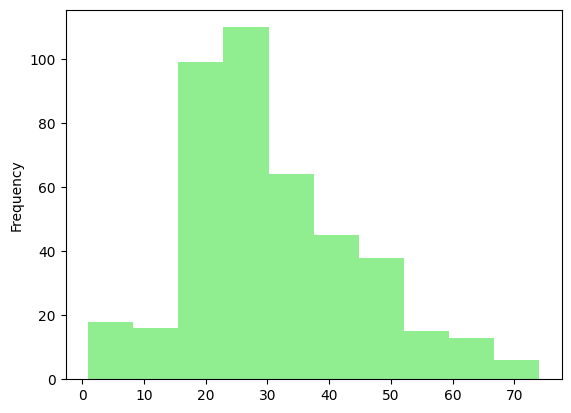

In [18]:
df[df['Survived'] == 0]['Age'].plot(kind='hist', color='lightgreen')

In [22]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

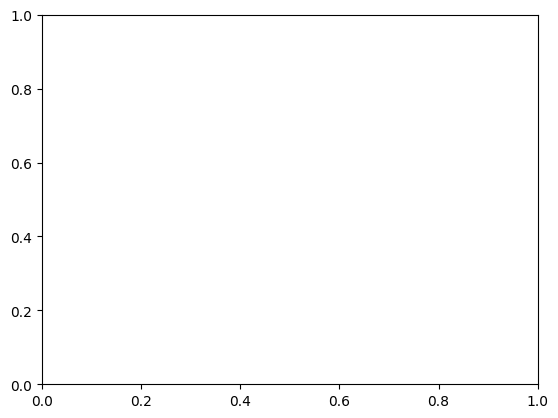

In [21]:
fig, ax = plt.subplots()

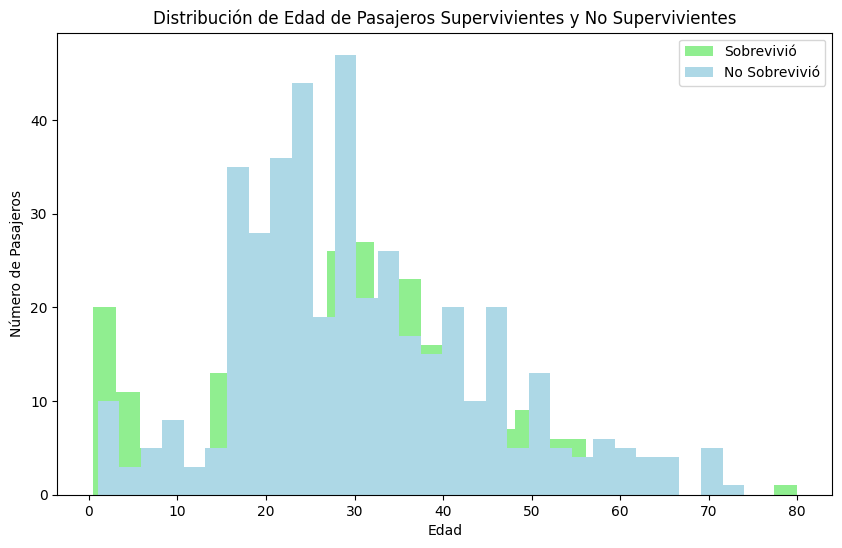

In [23]:
# Crear el histograma
plt.figure(figsize=(10, 6))
df[df['Survived'] == 1]['Age'].plot(kind='hist', bins=30, color='lightgreen', label='Sobrevivió')
df[df['Survived'] == 0]['Age'].plot(kind='hist', bins=30, color='lightblue', label='No Sobrevivió')

# Añadir títulos y etiquetas
plt.title('Distribución de Edad de Pasajeros Supervivientes y No Supervivientes')
plt.xlabel('Edad')
plt.ylabel('Número de Pasajeros')
plt.legend()

# Mostrar el gráfico
plt.show()

In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
df = df.drop(columns=['Name', 'Ticket', 'Cabin', 'Embarked'])

KeyError: "['Name', 'Ticket', 'Cabin', 'Embarked'] not found in axis"

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 825 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  825 non-null    int64  
 1   Pclass    825 non-null    int64  
 2   Age       825 non-null    int64  
 3   SibSp     825 non-null    int64  
 4   Parch     825 non-null    int64  
 5   Fare      825 non-null    float64
 6   Sex_male  825 non-null    bool   
dtypes: bool(1), float64(1), int64(5)
memory usage: 45.9 KB


In [ ]:
df.drop(columns='PassengerId', inpalce=True)

In [31]:
df.drop('PassengerId', axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [32]:
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [47]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22,1,0,7.2500,True
1,1,1,38,1,0,71.2833,False
2,1,3,26,0,0,7.9250,False
3,1,1,35,1,0,53.1000,False
4,0,3,35,0,0,8.0500,True


In [48]:
X = df.drop(columns='Survived')
y = df['Survived']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X_train.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male
260,3,29,0,0,7.7500,True
744,3,31,0,0,7.9250,True
699,3,42,0,0,7.6500,True
371,3,18,1,0,6.4958,True
325,1,36,0,0,135.6333,False


In [51]:
model = LogisticRegression(max_iter=1000)

In [52]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [53]:
y_pred = model.predict(X_test)

In [54]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Exactitud del modelo: {accuracy:.2f}')

Exactitud del modelo: 0.81


In [59]:
np.array(y_pred).shape

(165,)

In [60]:
class_report = classification_report(y_test, y_pred)
print('Informe de Clasificación:')
print(class_report)

Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84        99
           1       0.77      0.76      0.76        66

    accuracy                           0.81       165
   macro avg       0.80      0.80      0.80       165
weighted avg       0.81      0.81      0.81       165



In [61]:
# Obtener los coeficientes del modelo
coefficients = pd.DataFrame(model.coef_.flatten(), X.columns, columns=['Coeficiente'])
coefficients

,Coeficiente
Pclass,-1.018826
Age,-0.033794
SibSp,-0.279695
Parch,-0.093878
Fare,0.003041
Sex_male,-2.604534


In [62]:
# Ordenar por la magnitud de los coeficientes
coefficients['Abs_Coefficient'] = coefficients['Coeficiente'].abs()
coefficients = coefficients.sort_values(by='Abs_Coefficient', ascending=False)
coefficients

,Coeficiente,Abs_Coefficient
Sex_male,-2.604534,2.604534
Pclass,-1.018826,1.018826
SibSp,-0.279695,0.279695
Parch,-0.093878,0.093878
Age,-0.033794,0.033794
Fare,0.003041,0.003041


In [30]:
print('Coeficientes del modelo:')
print(coefficients.drop(columns='Abs_Coefficient'))

Coeficientes del modelo:
             Coeficiente
Sex_male       -2.594744
Pclass         -1.021858
SibSp          -0.286993
Parch          -0.086923
Age            -0.034076
Fare            0.003138
PassengerId    -0.000488
